<a href="https://www.kaggle.com/code/ayushs9020/training-multiple-models-on-commonlit?scriptVersionId=137695507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFC0CB; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFC0CB">1 | Goal ⚽️</p>

In [1]:
import warnings
warnings.filterwarnings("ignore")

<div style="border-radius:10px; border:#FFC0CB solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = "https://media.tenor.com/h9V9BRchFpIAAAAC/goal-soccer.gif">
    


<div style="border-radius:10px; border:#FFC0CB solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
This time we will try to train multiple models and also try to understand them in deep
    
* $RoBERTa$ $Base$
* $RoBERTa$ $Large$
* $AlBERT$ $Base$
* $DeBERTa$ $Base$
* $ELECTRA$

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">2 | Data 📊 </p>

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExNWxsanEzZ3VsbjdjaDV6Ymt6ajhsd2t2ZnoxNGV0ZXM0ZnJqcno4OSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/xT9C25UNTwfZuk85WP/200w.gif">

In [2]:
import pandas as pd 

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
This time we will focus on the `training` data only. Our training data is divided into $2$ directories
* **[Train Prompts](https://www.kaggle.com/competitions/commonlit-evaluate-student-summaries/data?select=prompts_train.csv)** - This file contains which prompts were given. These are important as summaries irrelevant to the prompts will be awarded with lower points.
* **[Train Summaries](https://www.kaggle.com/competitions/commonlit-evaluate-student-summaries/data?select=summaries_train.csv)** - This file contains which summareis were given in response to the prompts. 

Both the files are in `CSV(Comma Seperated Values)`, which include a common column `prompts_id` that can be seen as a connecting point between the $2$ distributed Data, this can be effectively concatenated with 
```
prompts_train.merge(summaries_train , on = "prompt_id")
```

In [3]:
train = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv").merge(
    pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv") , on = "prompt_id")

train.head()

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FF0000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF0000">3 | Tokenization🎟</p>

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">


<img src = "https://www.qualicen.de/wp-content/uploads/2021/03/TokenizerMeme.png" width = 400>

In [4]:
from transformers import AutoTokenizer
import numpy as np
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
Tokenization is the process of giving tokens to each distinct data point and seperating each token at particular values. This can be done by various ways such as 
* $Bag$ $of$ $Words$
* $Word$ $2$ $Vec$
* $Term$ $Frequency$ $-$ $Inverse$ $Document$ $Frequency$ $(TF-IDF)$
* $Global$ $Vectors$ $for$ $Word$ $Representation$ $(GLOVE)$

Here we will be using **[RoBERTa Tokenizer](https://huggingface.co/docs/transformers/model_doc/roberta#transformers.RobertaTokenizer)**

In [5]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

If we send a sample text like 
```
Your dreams are shining in the darkness. There is a intoxication in your eyes, You are in my dreams, in the answers, in the questions, Every day, I steal you in my thoughts
```

In [6]:
tokenizer("Why do I sleep less and dream more these days? , It seems God has some good intentions for me. , Yesterday I was a beggar, today I am a prince of the heart. , It seems God has some good intentions for me.")

{'input_ids': [0, 7608, 109, 38, 3581, 540, 8, 3366, 55, 209, 360, 116, 2156, 85, 1302, 1840, 34, 103, 205, 11304, 13, 162, 4, 2156, 15267, 38, 21, 10, 39882, 271, 6, 452, 38, 524, 10, 13705, 9, 5, 1144, 4, 2156, 85, 1302, 1840, 34, 103, 205, 11304, 13, 162, 4, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

What we would focus on the `input_ids`. 

In [7]:
tokens = tokenizer("Why do I sleep less and dream more these days? , It seems God has some good intentions for me. , Yesterday I was a beggar, today I am a prince of the heart. , It seems God has some good intentions for me." , 
                  return_tensors = 'np')["input_ids"]
tokens

array([[    0,  7608,   109,    38,  3581,   540,     8,  3366,    55,
          209,   360,   116,  2156,    85,  1302,  1840,    34,   103,
          205, 11304,    13,   162,     4,  2156, 15267,    38,    21,
           10, 39882,   271,     6,   452,    38,   524,    10, 13705,
            9,     5,  1144,     4,  2156,    85,  1302,  1840,    34,
          103,   205, 11304,    13,   162,     4,     2]])

100%|██████████| 7165/7165 [00:00<00:00, 17682.94it/s]


<Axes: xlabel='Max Length of the strings is 8046', ylabel='.'>

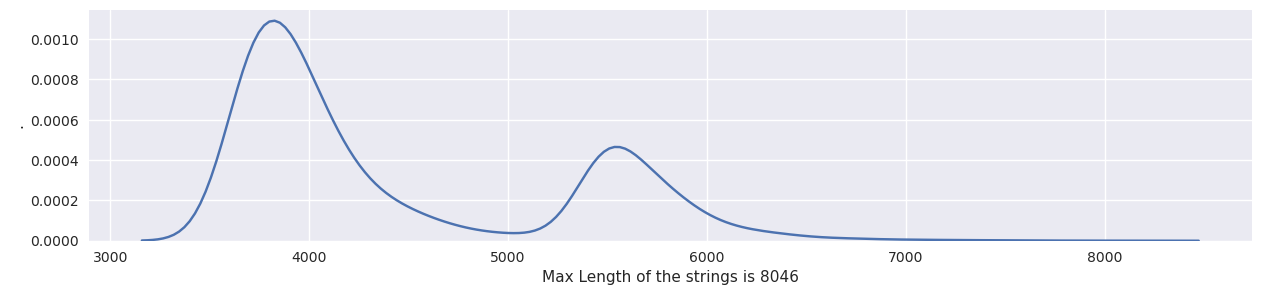

In [8]:
length = np.empty(shape = train.shape[0] , dtype = int)

for index in tqdm.tqdm(range(train.shape[0]) , total = train.shape[0]):
    
    stri = ""
    
    for columns in ['prompt_question' , 'prompt_title' , "prompt_text" , "text"]:
        
        stri += "\n\n" + str(train[columns][index])
        
    length[index] = len(stri)
    
plt.figure(figsize = (15, 3))
mpl.style.use("seaborn-v0_8")
plt.xlabel("Max Length of the strings is 8046")
plt.ylabel(".")
sns.kdeplot(length)

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

The maximum length of the string goes till $8046$, but the maximum length of our model is $512$, which is the maximum lenght of the transformer architechture. We need to address this issue in the `Training Loop` section

In [9]:
tokenizer.model_max_length = 8100

In [10]:
tokens = np.empty(shape = train.shape[0] , dtype = np.ndarray)

for index in tqdm.tqdm(range(train.shape[0]) , total = train.shape[0]):
                       
    stri = ""
    
    for columns in ["prompt_question" , "prompt_title" , "prompt_text" , "text"]:
        
        stri += "\n\n" + str(train[columns][index])
        
    tokens[index] = tokenizer(stri , return_tensors = 'np')["input_ids"]

100%|██████████| 7165/7165 [00:31<00:00, 229.41it/s]


In [11]:
np.save("/kaggle/working/Sample Tokens" , tokens)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#808080; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #808080">4 | DataLoader 📁</p>

In [12]:
from torch.utils.data import Dataset , DataLoader
import torch

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://jacobwgillespie.com/from-rest-to-graphql-3.jpg" width = 400>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Lets first make a simple class 

In [13]:
class DataSet(Dataset):pass

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Lets intialize the constructor

In [14]:
class DataSet(Dataset):
    
    def __init__(self , target = "content"):pass

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now lets load our datasets

In [15]:
class DataSet(Dataset):
    
    def __init__(self , target = "content"):
        
        train = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv").merge(
            pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv") , on = "prompt_id")
        
        self.embeds = np.load("/kaggle/working/Sample Tokens.npy" , allow_pickle = True)
        
        self.content = train["content"]
        self.wording = train["wording"]
        
        self.target = target

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now we will just add some getters

In [16]:
class DataSet(Dataset):
    
    def __init__(self , target = "content"):
        
        train = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv").merge(
            pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv") , on = "prompt_id")
        
        self.embeds = np.load("/kaggle/working/Sample Tokens.npy" , allow_pickle = True).tolist()
        
        self.content = train["content"]
        self.wording = train["wording"]
        
        self.target = target
        
    def __len__(self): return self.content.shape[0]
    
    def __getitem__(self , index):
        
        r_embeds = torch.tensor(self.embeds[index] , dtype = torch.long)
        
        if self.target == "content": r_targets = torch.tensor(self.content[index] , dtype = torch.float32)
        if self.target == "wording": r_targets = torch.tensor(self.wording[index] , dtype = torch.float32)
            
        return r_embeds , r_targets

In [17]:
train = DataSet(target = "content")

train_d = DataLoader(train , shuffle = True , batch_size = 1)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FF00; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FF00">5 | Model Setup 💻</p>

In [18]:
from transformers import AutoModel
import torch.nn as nn

<div style="border-radius:10px; border:#00FF00 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">


<img src = "https://1.bp.blogspot.com/-SUiFNF4VT1Q/YL1Otnqu-RI/AAAAAAAAicQ/WhJbPcGwJRUb9UuJmxBcUCWBFGcIh57UgCNcBGAsYHQ/s675/E3OEwuMWUAwfU1I.jpg" width = 400>

<div style="border-radius:10px; border:#00FF00 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now lets setup the model, that will predict for us 
        
## $5.1 , 5.2$ $|$ $RoBERTa$

Before `training a Roberta Model`, it is important to first `understand the model in deep`, it gives insights about its life.
* $How$ $it$ $was$ $originated..?$ 
* $What$ $hurdles$ $it$ $faced...?$
* $How$ $did$ $it$ $overcome$ $them...?$
* $What$ $upgrades$ $it$ $had$ $in$ $its$ $life...?$
* $How$ $its$ $life$ $went...?$ 
* $Did$ $it$ $had$ $any$ $hearbreaks...?$
* $Was$ $it$ $a$ $job$ $person$, $or$ $an$ $enterprenuer...?$

These information is `important`, as it becomes a `good topic` for `gossips` among the `Data Scientists` and other related people

So it was just a normal summer of $July$ , $2019$, when some scientists from $FACEBOOK$ $AI$, found that $BERT$ which was released in $2017$, was a person, who had a `great amount of knowledge`/`abilities`/`strength`/`LEGO Peices(very very valuable)`, but was `not upto its potential`. Researches did some `extensive researh` and found that, with some `fine-tuning`/`consilting-sessions` $BERT$ could `beat many more LLMs`, that were `born after it`, which was very much `extraordinary` (in itself). This was kind of a `heartbreak` for $BERT$, but it also `motivated` it to be a `better version` of itslef. 

<img src = "https://i.imgflip.com/2uzxes.jpg?a469272" width = 400>

Scientists helped it to `restore its heart`, they got it back from depression (yes it was in depression). It got upgraded in many a ways, first was the name, $BERT$ wanted to change its name, so it was given a new name $RoBERTa$ $Robust$ $Optimized$ $BERT$ $Pretraining$ $Approach$ 

* $Larger$ $Dataset$ - Previously $BERT$ was trained on **[Toronto BookCorpus](https://en.wikipedia.org/wiki/BookCorpus)/[English Wikipidea](https://huggingface.co/datasets/wikipedia)** $3.5 Billion$ $Words$. $RoBERTa$ was now trained on a larger dataset of **[CC-NEWS](https://paperswithcode.com/dataset/cc-news)/[Open Web Text](https://huggingface.co/datasets/Skylion007/openwebtext)/[STORIES](https://paperswithcode.com/dataset/cc-stories)** $15 Billion$ $Words$. This helped it to `gather more knowledge` and be more `resilient` to the curelty of the world. People name this ability as $Robust$
* $Larger$ $Batch$ $Size$ - The `heartbroken version BERT` had a batch size of $128$, whereas , $RoBERTa$ was also upgraded on Batch Size $8,000$

Roberta had also `unlocked a new skill` as it progressed. $BERT$, its previous version, had `MASKED tokens` of a `fixed size` and `place` (`static`), whereas $RoBERTa$ had `Dynamically Changing Masking Pattern`

Along with new abilites, $RoBERTa$ was also forced to `leave some abilities`, one of which was `able to see ahead in time`, people also call this **Next Sentence Prediction**. Scientinst found that, $NSP$ was not that `much usefull in training`, and thus removed it 

With these upgraded, $Roberta$ was now able to `beat many more LLMs ahead of its time`, it also `surpassed its own version` on **[GLUE  General Language Understanding Evaluation benchmark](https://huggingface.co/datasets/glue)**, with a preceding score of $0.1$, previous was $8.5$. $RoBERTa$ also achieved great results on $4/9$ tasks of GLUE which included **[MNLI](https://cims.nyu.edu/~sbowman/multinli/)/[QNLI](https://paperswithcode.com/dataset/qnli)/[RTE](https://paperswithcode.com/dataset/rte)/[STS-B](https://paperswithcode.com/task/sts-b)** as well aced the exams of **[SQuad](https://huggingface.co/datasets/squad)/[RACE](https://www.cs.cmu.edu/~glai1/data/race/)**

The $Tokenization$ process `remained the same`, wehere $2$ `concatenated sequence` of `tokens` are provided named ad $x_1 , x_2 , x_3 , ... , x_n$/$y_1 , y_2 , y_3 , ... , y_M$. Assuming that the lenght do not exceeds $512$, $M+N<512$

There are several tasks, on which RoBERTa is trained
* $Dynamic$ $Masked$ $Langauge$ $Modeling$ $(MLM)$ - $RoBERTA$ uniformaly masks $80$% of the tokens. Out of these $80$%, $10$% are decided to be always masked, and the remaining are changed overtime. This is done by repeating the sentence with different postions of masks

* $Next$ $Sentence$ $Prediction$ $(NSP)$ - NSP has now become a `questionable training procedure`, founders of $BERT$ said that it `adds great improvment` to the `models`/`architechture`. But there recent studies shows that it is `not required that much` for `training`/`better performances`. Thus $2$ `different models were trained`, one with NSP, and one without. The one which was not trained on NSP performed better 

Adam Optimizer was taken into account with the following hyperparameters
* $\beta_1$ $=$ $0.9$
* $\beta_2$ $=$ $0.98$
* $\alpha$ $=$ $1e-6$/$1^{-6}$
* $L_2$ $=$ $0.01$
* $epochs$ $=$ $10,000$
* $GELU$
    
We will be training $2$ different models of the same base of $RoBERTa$
* $RoBERTa$ $Base$
* $RoBERTa$ $Large$

In [19]:
class model(nn.Module):
    
    def __init__(self):
        super(model, self).__init__()
    
        self.r_model = AutoModel.from_pretrained("roberta-base")

        self.ln = nn.LayerNorm(768)
        self.out = nn.Linear(768, 1)
    
    def forward(self, inputs):
    
        emb = self.r_model(inputs)[0]
        emb = torch.mean(emb, axis=1)
        
        output = self.ln(emb)
        output = self.out(output)
        
        return output

In [20]:
class model(nn.Module):
    
    def __init__(self):
        super(model, self).__init__()
    
        self.r_model = AutoModel.from_pretrained("roberta-large")

        self.ln = nn.LayerNorm(1024)
        self.out = nn.Linear(1024, 1)
    
    def forward(self, inputs):
    
        emb = self.r_model(inputs)[0]
        emb = torch.mean(emb, axis = 1)
        
        output = self.ln(emb)
        output = self.out(output)
        
        return output

<div style="border-radius:10px; border:#00FF00 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
## $5.3$ $|$ $ALBERT$

As we have made `more advancemnets` in `NLP tasks`, We have aso `imensly increased` the `scale of our model`. We are having models of `Billion Parameters`, which itself comes with `more memory` and `time complexites`. Ass the `models` `increase in size`, thier `resoruce` `demand` also `increase`

Thus $A$ $Little$ $BERT$ $(ALBERT)$ was created to `address this problem`

$ALBERT$ comes with a `similar sturcture` as of $BERT$ but with `major tweek`s in `configuration` and `training objectives`

* $Factorized$ $Embeddings$ $Parameterization$ 

The normal `Embedding Layers` in `NLPs` are of the `size` of 

$$size = (V x L)$$

where
* $v$ $=$ $Vocab$ $Size$
* $L$ $=$ $Corpus$ $Length$

which is `further combined` with `Hidden Layers`. This combining result in `larger sizes` of the `layers`, thus resulting in `more Traininable Parameters`. 

$Embedding$ $Layers$ are designed to `learn non-contextual meanings` of the words

$Hidden$ $Layers$ are designed to `learn contextual meanings` of the words. 

`Seperating` them results in `Embedding Layers`/`Hidden Layers` of `better quality`, as well as `less Trainable Parameters` 

$$size = (V x E + E x H)$$

This is done by `first projecting` the `Vectors` to `Smaller Embedding Layers` and further `projecting them to Hidden Layers`

* $Cross$ $Layer$ $Parameter$ $Sharing$ - Researchers decided to `transfer the information` `between` all the `layers` of the `Model`. This `retained` the `amount` of `information transfer`, and also helped in `reducing` the `number` of `Trainable Parameters`

This resulted in $18x$ $Smaller$ model which was $1.7x$ $Faster$

A `new type` of $Loss$ $Function$ was used in $ALBERT$, $Sentence$ $Order$ $Prediction$ $(SOP)$, which increased the performance of the model, despite having less trainable Parameters

$$loss = -log(p(y_true | h_1, h_2))$$

In [21]:
class model(nn.Module):
    
    def __init__(self):
        super(model, self).__init__()
    
        self.r_model = AutoModel.from_pretrained("albert-base-v2")

        self.ln = nn.LayerNorm(768)
        self.out = nn.Linear(768, 1)
    
    def forward(self, inputs):
    
        emb = self.r_model(inputs)[0]
        emb = torch.mean(emb, axis = 1)
        
        output = self.ln(emb)
        output = self.out(output)
        
        return output

<div style="border-radius:10px; border:#00FF00 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $5.4$ $|$ $DeBERTa$

$DeBERTa$ is proposed as a `successor` of $BERT$ and $RoBERTa$ with `some tweeks`

* $Disantangled$ $Attention$ $Machenism$ - In BERT the attenstian heads recieved infomration as the addition of position vectors and the context vectors. De BERTa used a different mechanism, sending these in a couple. and further calculating with the help of disantangled matrics

$$A_{i , j} = (H_i , P_{i|j}) x (H_i , P_{i|J})^T$$
$$= H_iH_j^T + H_IP_{j|i}^T + P_{i|j}H_j^T + P_{i|j}P_{j|i}^T$$
* $Enhanced$ $Mask$ $Decoder$ - which aims at predicting the absoute position of the word as well

$$max logp_θ(X|̂X) = max\sum_{sEC}logP_Θ(̂x_i == x_i|̂X)$$



In [22]:
class model(nn.Module):

    def __init__(self):
        super(model, self).__init__()

        self.r_model = AutoModel.from_pretrained("microsoft/deberta-base")

        self.ln = nn.LayerNorm(768)
        self.out = nn.Linear(768, 1)

    def forward(self, inputs):

        emb = self.r_model(inputs)[0]
        emb = torch.mean(emb, axis=1)

        output = self.ln(emb)
        output = self.out(output)

        return output

<div style="border-radius:10px; border:#00FF00 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $5.5$ $|$ $ELECTRA$

`Famous tradition architechtures` like $BERT$/$GPT$/$T5$/$XLNET$, use the method of `Masked Language Modelling` $(MLM)$, which `corrupts` the `input randomly` $(10-20)$% putting a `mask` on the `words` and ask the `model` to `predict` the `masked words`. This type of `training objective` is `expensive` as the `network only learns` around $15$% from `each token`

$Efficiently$ $Learning$ $Encoder$ $Classifies$ $Token$ $Replecements$ $Accurately$ $(ELECTRA)$ uses the `same concept`, but with a `little tweek`. Instead of masking the words, the `words` are `replaced` by `another corrupt word`, and asked to `predict wether a given word` was `replaced`/`not`

This technique not only `decreases` the `parameter count` but also `increase` the `accuracy`.

This type of architechture can be compared to a $Generative$ $Adverserial$ $Networks$ $(GANs)$ where a $Generator$
 is a `seperate` $Neural$ $Network$ that tries to `make false samples` and $Discriminator$, another $NN$ is trained to `predict` if those are `real`/`fake`.

 A key difference between $GANs$ and $ELECTRA$ is the size of $Discriminator$/$Generator$. Whereas in $GANs$ both the models are of `same size`, in $ELECTRA$ the $Generator$ is basically a smaller version of $Discriminator$. This was made on purpose as, if not done, would take $2$ as much time as $BERT$.

 $Generater$/$Discriminitor$ also share $Embedding$ $Wegihts$, which further `decreases` the number of `Trainable Parameters`

In [23]:
class model(nn.Module):

    def __init__(self):
        super(model, self).__init__()

        self.r_model = AutoModel.from_pretrained("google/electra-small-discriminator")

        self.ln = nn.LayerNorm(256)
        self.out = nn.Linear(256 , 1)

    def forward(self, inputs):

        emb = self.r_model(inputs)[0]
        emb = torch.mean(emb, axis=1)

        output = self.ln(emb)
        output = self.out(output)

        return output

In [24]:
sample_model = model()

# sample_model = model().to("cuda")

Some weights of the model checkpoint at google/electra-small-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFA500; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFA500">6 | Training Arguments 💾</p>

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = "https://images7.memedroid.com/images/UPLOADED668/5f917ecab395b.jpeg" width = 400>

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $6.1$ $|$ $Loss$ $Function$
    
As we have a Regression Task, it is best to use $Mean$ $Squared$ $Loss$ $(MSE Loss)$

In [25]:
loss_func = nn.MSELoss()

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $6.2$ $|$ $Optimizer$ 
    
* $RoBERTa$ $Base$
* $RoBERTa$ $Large$

In [26]:
optim = torch.optim.Adam(sample_model.parameters() , lr = 1e-6 , weight_decay = 0.01)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">7 | Training Loop 💽</p>

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = "https://programmerhumor.io/wp-content/uploads/2022/10/programmerhumor-io-programming-memes-8dfe737e6fb797b-758x757.jpg" width = 400>



<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now lets intialize the training loop
    
I cannot use `Kaggle GPU` due to some reason, thats why I am importing the results from `Wandb`. Below is the code I used 
   
## $7.1$ $|$ $RoBERTa$ $Base$
    
The total time was around $5$ $Minutes$ for $1$ epoch, with a batch size of $1$
    
## $7.2$ $|$ $RoBERTa$ $Large$
    
The total time was around $14$ $Minutes$ for $1$ epoch, with a batch size of $1$

## $7.4$ $|$ $DeBERTa$ $Base$
    
The total time was around $5$ $Minutrs$
    
## $7.5$ $|$ $ELECTRA$
    
The total time was around $2$ $Minutes$
```
# wandb.watch(ro , loss_func)

for x , y in tqdm.tqdm(train_d , total = len(train_d)):
    
    torch.cuda.empty_cache()
    x = x[0]
    if x.shape[1] > 512: x = x[: , :512]
    
#     x = x.to("cuda")
#     y = y.to("cuda")
    
    pred = sample_model(x)

    loss = loss_func(pred , y)
#     wandb.log({"loss": loss})

    loss.backward

    optim.step()
```

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">8 | Results 🏆</p>

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://media.tenor.com/xoVXud0uxOgAAAAC/miracle-miracle-miracle.gif">

In [27]:
from IPython.display import IFrame

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Lets see how our model performed over the data 
    
## $8.1$ $|$ $RoBERTa$ $Base$

In [28]:
IFrame("https://wandb.ai//ayushsinghal659/RoBERTa%20xx%20Small%7CCommonLit%20Evaluate%20Student/reports/RoBERTa-Small-CommonLit-Evaluate-Student--Vmlldzo0OTE5MDcz" , 1000 , 400)

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
## $8.2$ $|$ $RoBERTa$ $Large$

loss	▇▄▅▃▁▅▃▂█▁▅▂▂▆▃▄▃▂▃▂▃▄█▅▁▇▁▃▃▄▃▇▁▆▂▃▄▁▂▁

loss	1.80729

In [29]:
IFrame("https://wandb.ai/ayushsinghal659/RoBERTa%20Large%20%7C%20CommonLit/reports/RoBERTa-Large-CommonLit--Vmlldzo0OTQwMjU3" , 1000 , 400)

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $8.3$ $|$ $ALBERT$ $Base$ $V2$

loss	▁▃▂▁▂▃▁▂▂▆▂▆▁▁▅▁▃▂▁▃▃▁▅▃█▁▅▆▃▄█▂▁▁▅▃▁▅█▁

loss	0.17833

In [30]:
IFrame("https://wandb.ai/ayushsinghal659/Albert%20Base%7C%20CommonLit/reports/ALBERT-COMMON-LIT--Vmlldzo0OTQ1NjIy" , 1000 , 400)

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $8.4$ $|$ $DeBERTa$ $Base$

loss	▂▂▄▁▃▁▃▂▂▁▁▂▃▁▄▂▂▁▂▂█▁▂▂▃▂▂▁▁▂▂▁▄▁▃▁▁▁▆▂

loss	0.00591

In [31]:
IFrame("https://wandb.ai/ayushsinghal659/Deberta%20Base%7C%20CommonLit/reports/DEBERTA-COMMON-LIT--Vmlldzo0OTQ4MzM2" , 1000 , 400)

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $8.5$ $|$ $ELECTRA$

loss	▁▂▁▁▁▁▁▁█▂▁▁▁▂▂▁▂▄▁▂▁▂▁▃▁▁▁▆▁▂█▂▂▁▁▃▃▁▁▃

loss	3.49394

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFC0CB; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFC0CB">9 | TO DO LIST ✔️</p>
<div style="border-radius:10px; border:#FFC0CB solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = "https://images2.memedroid.com/images/UPLOADED10/513bbf63f07c1.jpeg" width = 400>

* $TO$ $DO$ $LIST$ $1$ $:$ $IMPROVE$ $SCORES$
* $TO$ $DO$ $LIST$ $2$ $:$ $REDUCE$ $TRAINING$ $TIME$
* $TO$ $DO$ $LIST$ $3$ $:$ $UPDGRADE$ $MODEL$
* $TO$ $DO$ $LIST$ $4$ $:$ $DANCE$

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#800080; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #800080">10 | Ending 🏁</p>
<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = "https://media.tenor.com/QGk8WCu_5r8AAAAd/the-rock-stop.gif" width = 400>
    
**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK  $:)$**
    
<img src = "https://i.imgflip.com/19aadg.jpg">
    
**PEACE OUT $!!!$**